# Matplotlib: Python Ploting

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab. It can also be used with graphics toolkits like PyQt and wxPython.

# Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.colors
import matplotlib.cm as cm
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.path import Path
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.transforms as mtrans
from matplotlib.patches import Ellipse
from matplotlib.textpath import TextPath
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle, PathPatch
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, PathPatch

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Matplotlib is Fun!

In [2]:
    """
    Create a polar axes containing the matplotlib radar plot.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        The figure to draw into.
    ax_position : (float, float, float, float)
        The position of the created Axes in figure coordinates as
        (x, y, width, height).
    lw_bars : float
        The linewidth of the bars.
    lw_grid : float
        The linewidth of the grid.
    lw_border : float
        The linewidth of the Axes border.
    rgrid : array-like
        Positions of the radial grid.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The created Axes.
    """
    """
    Create a full figure with the Matplotlib logo.

    Parameters
    ----------
    height_px : int
        Height of the figure in pixel.
    lw_bars : float
        The linewidth of the bar border.
    lw_grid : float
        The linewidth of the grid.
    lw_border : float
        The linewidth of icon border.
    rgrid : sequence of float
        The radial grid positions.
    with_text : bool
        Whether to draw only the icon or to include 'matplotlib' as text.
    """

"\nCreate a full figure with the Matplotlib logo.\n\nParameters\n----------\nheight_px : int\n    Height of the figure in pixel.\nlw_bars : float\n    The linewidth of the bar border.\nlw_grid : float\n    The linewidth of the grid.\nlw_border : float\n    The linewidth of icon border.\nrgrid : sequence of float\n    The radial grid positions.\nwith_text : bool\n    Whether to draw only the icon or to include 'matplotlib' as text.\n"

Original font not found. The logo text will not be in the correct font.


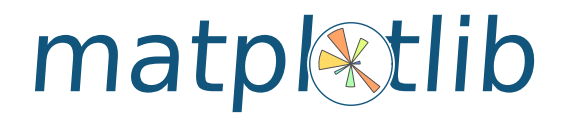

In [3]:
MPL_BLUE = '#11557c'

def get_font_properties():
    # The original font is Calibri, if that is not installed, we fall back
    # to Carlito, which is metrically equivalent.
    if 'Calibri' in matplotlib.font_manager.findfont('Calibri:bold'):
        return matplotlib.font_manager.FontProperties(family='Calibri',
                                                      weight='bold')
    if 'Carlito' in matplotlib.font_manager.findfont('Carlito:bold'):
        print('Original font not found. Falling back to Carlito. '
              'The logo text will not be in the correct font.')
        return matplotlib.font_manager.FontProperties(family='Carlito',
                                                      weight='bold')
    print('Original font not found. '
          'The logo text will not be in the correct font.')
    return None

def create_icon_axes(fig, ax_position, lw_bars, lw_grid, lw_border, rgrid):

    with plt.rc_context({'axes.edgecolor': MPL_BLUE,
                         'axes.linewidth': lw_border}):
        ax = fig.add_axes(ax_position, projection='polar')
        ax.set_axisbelow(True)

        N = 7
        arc = 2. * np.pi
        theta = np.arange(0.0, arc, arc / N)
        radii = np.array([2, 6, 8, 7, 4, 5, 8])
        width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
        bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge',
                      edgecolor='0.3', lw=lw_bars)
        for r, bar in zip(radii, bars):
            color = *cm.jet(r / 10.)[:3], 0.6  # color from jet with alpha=0.6
            bar.set_facecolor(color)

        ax.tick_params(labelbottom=False, labeltop=False,
                       labelleft=False, labelright=False)

        ax.grid(lw=lw_grid, color='0.9')
        ax.set_rmax(9)
        ax.set_yticks(rgrid)

        # the actual visible background - extends a bit beyond the axis
        ax.add_patch(Rectangle((0, 0), arc, 9.58,
                               facecolor='white', zorder=0,
                               clip_on=False, in_layout=False))
        return ax

def create_text_axes(fig, height_px):
    """Create an axes in *fig* that contains 'matplotlib' as Text."""
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_aspect("equal")
    ax.set_axis_off()

    path = TextPath((0, 0), "matplotlib", size=height_px * 0.8,
                    prop=get_font_properties())

    angle = 4.25  # degrees
    trans = mtrans.Affine2D().skew_deg(angle, 0)

    patch = PathPatch(path, transform=trans + ax.transData, color=MPL_BLUE,
                      lw=0)
    ax.add_patch(patch)
    ax.autoscale()

def make_logo(height_px, lw_bars, lw_grid, lw_border, rgrid, with_text=False):

    dpi = 100
    height = height_px / dpi
    figsize = (5 * height, height) if with_text else (height, height)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.patch.set_alpha(0)

    if with_text:
        create_text_axes(fig, height_px)
    ax_pos = (0.535, 0.12, .17, 0.75) if with_text else (0.03, 0.03, .94, .94)
    ax = create_icon_axes(fig, ax_pos, lw_bars, lw_grid, lw_border, rgrid)

    return fig, ax

make_logo(height_px=110, lw_bars=0.7, lw_grid=0.5, lw_border=1,
          rgrid=[1, 3, 5, 7], with_text=True)
plt.show()

# Reference for Matplotlib artists
This example displays several of Matplotlib's graphics primitives (artists) drawn using matplotlib API. A full list of artists and the documentation is available at the artist API.

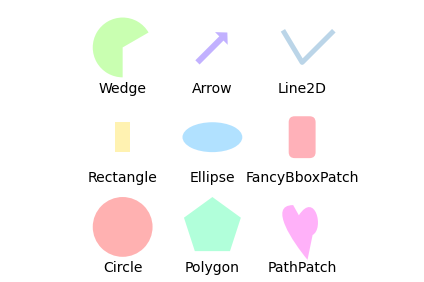

In [4]:
def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = ([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(colors)
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

# Ellipse Demo
This draws many ellipses by a random state

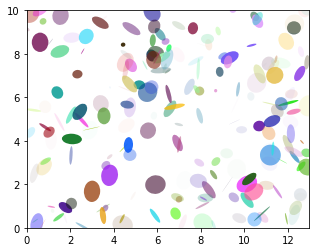

In [5]:
# Fixing random state for reproducibility
np.random.seed(1968089)

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 13,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(4))

ax.set_xlim(0, 13)
ax.set_ylim(0, 10)

plt.show()

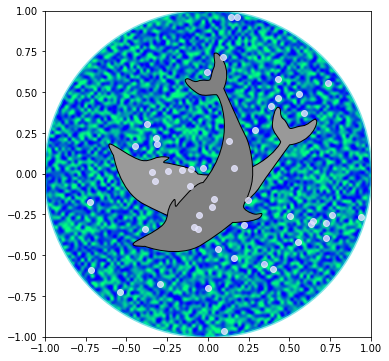

In [6]:
# Fixing random state for reproducibility
np.random.seed(19680801)


r = np.random.rand(50)
t = np.random.rand(50) * np.pi * 2.0
x = r * np.cos(t)
y = r * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)

im = plt.imshow(np.random.random((100, 100)),
                origin='lower', cmap=cm.winter,
                interpolation='spline36',
                extent=([-1, 1, -1, 1]))
im.set_clip_path(circle)

plt.plot(x, y, 'o', color=(0.9, 0.9, 1.0), alpha=0.8)

dolphin = """
M -0.59739425,160.18173 C -0.62740401,160.18885 -0.57867129,160.11183
-0.57867129,160.11183 C -0.57867129,160.11183 -0.5438361,159.89315
-0.39514638,159.81496 C -0.24645668,159.73678 -0.18316813,159.71981
-0.18316813,159.71981 C -0.18316813,159.71981 -0.10322971,159.58124
-0.057804323,159.58725 C -0.029723983,159.58913 -0.061841603,159.60356
-0.071265813,159.62815 C -0.080250183,159.65325 -0.082918513,159.70554
-0.061841203,159.71248 C -0.040763903,159.7194 -0.0066711426,159.71091
0.077336307,159.73612 C 0.16879567,159.76377 0.28380306,159.86448
0.31516668,159.91533 C 0.3465303,159.96618 0.5011127,160.1771
0.5011127,160.1771 C 0.63668998,160.19238 0.67763022,160.31259
0.66556395,160.32668 C 0.65339985,160.34212 0.66350443,160.33642
0.64907098,160.33088 C 0.63463742,160.32533 0.61309688,160.297
0.5789627,160.29339 C 0.54348657,160.28968 0.52329693,160.27674
0.50728856,160.27737 C 0.49060916,160.27795 0.48965803,160.31565
0.46114204,160.33673 C 0.43329696,160.35786 0.4570711,160.39871
0.43309565,160.40685 C 0.4105108,160.41442 0.39416631,160.33027
0.3954995,160.2935 C 0.39683269,160.25672 0.43807996,160.21522
0.44567915,160.19734 C 0.45327833,160.17946 0.27946869,159.9424
-0.061852613,159.99845 C -0.083965233,160.0427 -0.26176109,160.06683
-0.26176109,160.06683 C -0.30127962,160.07028 -0.21167141,160.09731
-0.24649368,160.1011 C -0.32642366,160.11569 -0.34521187,160.06895
-0.40622293,160.0819 C -0.467234,160.09485 -0.56738444,160.17461
-0.59739425,160.18173
"""

vertices = []
codes = []
parts = dolphin.split()
i = 0
code_map = {
    'M': Path.MOVETO,
    'C': Path.CURVE4,
    'L': Path.LINETO,
}

while i < len(parts):
    path_code = code_map[parts[i]]
    npoints = Path.NUM_VERTICES_FOR_CODE[path_code]
    codes.extend([path_code] * npoints)
    vertices.extend([[*map(float, y.split(','))]
                     for y in parts[i + 1:][:npoints]])
    i += npoints + 1
vertices = np.array(vertices)
vertices[:, 1] -= 160

dolphin_path = Path(vertices, codes)
dolphin_patch = PathPatch(dolphin_path, facecolor=(0.6, 0.6, 0.6),
                          edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch)

vertices = Affine2D().rotate_deg(60).transform(vertices)
dolphin_path2 = Path(vertices, codes)
dolphin_patch2 = PathPatch(dolphin_path2, facecolor=(0.5, 0.5, 0.5),
                           edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch2)

plt.show()

# BboxImage
A BboxImage can be used to position an image according to a bounding box. This demo shows how to show an image inside a text.Text's bounding box as well as how to manually create a bounding box for the image.

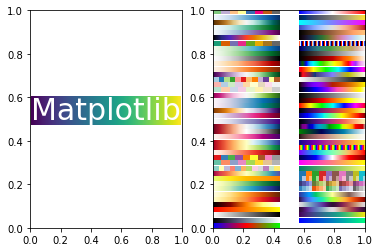

In [7]:
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "Matplotlib", size=30, ha="center", color="w")
kwargs = dict()

bbox_image = BboxImage(txt.get_window_extent,
                       norm=None,
                       origin=None,
                       clip_on=False,
                       **kwargs
                       )
a = np.arange(256).reshape(1, 256)/256.
bbox_image.set_data(a)
ax1.add_artist(bbox_image)

# ------------------------------------
# Create a BboxImage for each colormap
# ------------------------------------
a = np.linspace(0, 1, 256).reshape(1, -1)
a = np.vstack((a, a))

# List of all colormaps; skip reversed colormaps.
maps = sorted(m for m in plt.colormaps() if not m.endswith("_r"))

ncol = 2
nrow = len(maps)//ncol + 1

xpad_fraction = 0.3
dx = 1./(ncol + xpad_fraction*(ncol - 1))

ypad_fraction = 0.3
dy = 1./(nrow + ypad_fraction*(nrow - 1))

for i, m in enumerate(maps):
    ix, iy = divmod(i, nrow)

    bbox0 = Bbox.from_bounds(ix*dx*(1 + xpad_fraction),
                             1. - iy*dy*(1 + ypad_fraction) - dy,
                             dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)

    bbox_image = BboxImage(bbox,
                           cmap=plt.get_cmap(m),
                           norm=None,
                           origin=None,
                           **kwargs
                           )

    bbox_image.set_data(a)
    ax2.add_artist(bbox_image)

plt.show()

# Colored Spiral

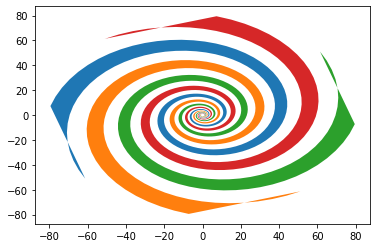

In [8]:
theta = np.arange(0, 7*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()

# Scatter plot on polar axis
Size increases radially in this example and color increases with angle.

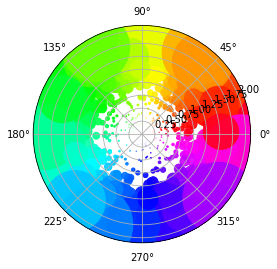

In [9]:
# Fixing random state for reproducibility
np.random.seed(186123915)

# Compute areas and colors
N = 600
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 100 * r**6
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='gist_rainbow', alpha=0.9)

Scatter plot on polar axis, with offset origin.

The main difference with the previous plot is the configuration of the origin radius, producing an annulus. Additionally, the theta zero location is set to rotate the plot.

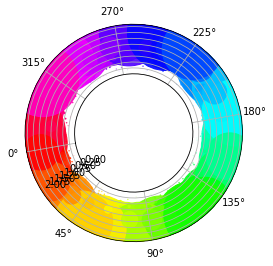

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.9)

ax.set_rorigin(-2.5)
ax.set_theta_zero_location('W', offset=10)

Scatter plot on polar axis confined to a sector.

The main difference with the previous plots is the configuration of the theta start and end limits, producing a sector instead of a full circle.

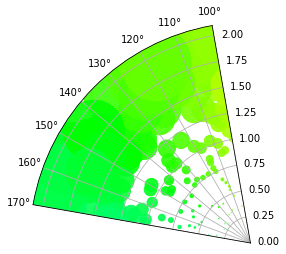

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='gist_rainbow', alpha=0.9)

ax.set_thetamin(100)
ax.set_thetamax(170)

plt.show()

# Frontpage 3D

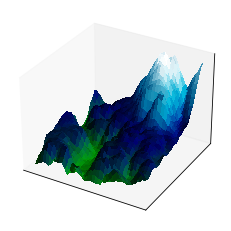

In [12]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource

dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[10:50, 10:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(275, 200)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.ocean, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface3d_frontpage.png", dpi=35)  # results in 160x120 px image

Frontpage 2D 

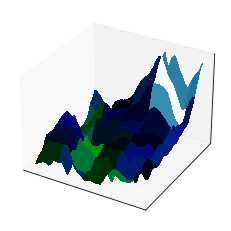

In [13]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

s = LightSource(275, 400)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.ocean, vert_exag=0.5, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=5, cstride=9, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.savefig("surface2d_frontpage.png", dpi=35)  # results in 160x120 px image

# 3D stem
Demonstration of a stem plot in 3D, which plots vertical lines from a baseline to the z-coordinate and places a marker at the tip.

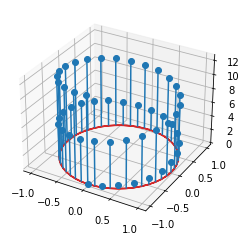

In [14]:
theta = np.linspace(0, 4*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()

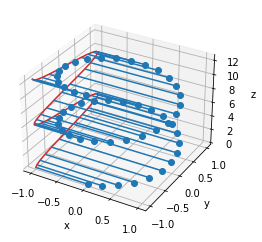

In [15]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(x, y, z, bottom=-1, orientation='x')
ax.set(xlabel='x', ylabel='y', zlabel='z')

plt.show()

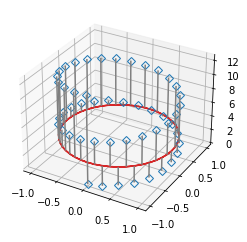

In [16]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(
    x, y, z, linefmt='grey', markerfmt='D', bottom=np.pi)
markerline.set_markerfacecolor('none')

plt.show()

# Circular 3D surface

Solid color

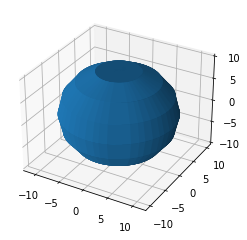

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 6 * np.pi, 500)
v = np.linspace(0, np.pi, 9)
x = 11 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

plt.show()

Polar Coordinates

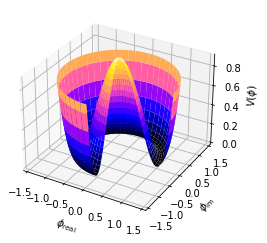

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.4, 60)
p = np.linspace(0, 1.5*np.pi, 40)
R, P = np.meshgrid(r, p)
Z = ((R**1.9 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap= 'gnuplot2')

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 0.9)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

# Triangular 3D Surfaces

Plot a triangular mesh that is 3D surface 

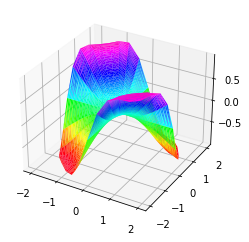

In [19]:
n_radi = 30
n_angles = 90

# Make radi and angles spaces (radius r=0 omitted to eliminate duplication).
radi = np.linspace(0.5, 2.0, n_radi)
angles = np.linspace(0, 5*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radi, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radi*np.cos(angles)).flatten())
y = np.append(0, (radi*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

ax = plt.figure().add_subplot(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.5, antialiased=True, cmap='gist_rainbow')

plt.show()

Shows the use of plot_trisurf's triangles argument

(-1.0, 1.0)

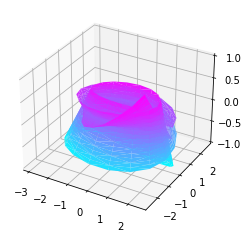

In [20]:
import matplotlib.tri as mtri

fig = plt.figure(figsize=plt.figaspect(0.4))

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 6.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-1.9, 0.9, endpoint=True, num=15)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (2 + 0.5 * v * np.cos(u / 3.0)) * np.cos(u)
y = (1 + 0.9 * v * np.cos(u / 5.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 5.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.cool)
ax.set_zlim(-1, 1)

Sets a Triangulation object's mask and passes the object directly to plot_trisurf

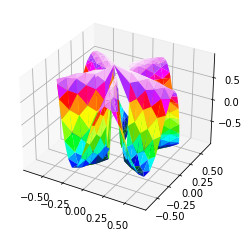

In [21]:
fig = plt.figure(figsize=plt.figaspect(0.4))

# Make parameter spaces radii and angles.
n_angles = 89
n_radii = 6
min_radius = 0.15
radii = np.linspace(min_radius, 0.65, n_radii)

angles = np.linspace(0, 3*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(5*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = xmid**2 + ymid**4 < min_radius**3
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.gist_ncar)


plt.show()

# 3d voxel/ volumetric plot

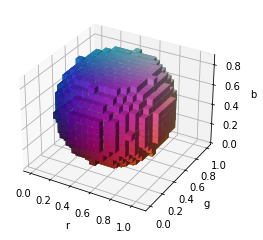

In [22]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((19, 18, 16)) / 17.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(3*colors - 0.8, 0, 1),  # brighter
          linewidth=0.1)
ax.set(xlabel='r', ylabel='g', zlabel='b')

plt.show()

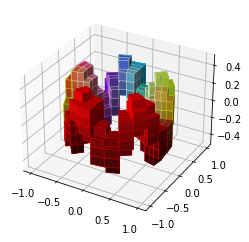

In [23]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, theta, z = np.mgrid[0:1:11j, 0:np.pi*2:25j, -0.5:0.5:11j]
x = r*np.cos(theta)
y = r*np.sin(theta)

rc, thetac, zc = midpoints(r), midpoints(theta), midpoints(z)

# define a wobbly torus about [0.7, *, 0]
sphere = (rc - 0.7)**2 + (zc + 0.2*np.cos(thetac*5))**2 < 0.2**2

# combine the color components
hsv = np.zeros(sphere.shape + (3,))
hsv[..., 0] = thetac / (np.pi*1)
hsv[..., 1] = rc
hsv[..., 2] = zc + 0.6
colors = matplotlib.colors.hsv_to_rgb(hsv)

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, sphere,
          facecolors=colors,
          edgecolors=np.clip(5*colors - 0.6, 0, 1),  # brighter
          linewidth=0.5)

plt.show()

# If you like this notebook, please give an Upvote! Don't forget to check out my other notebooks too!

* [ConnectX Baseline](https://www.kaggle.com/brendan45774/connectx-baseline)
* [Countries Life Expectancy Animation](https://www.kaggle.com/brendan45774/countries-life-expectancy-animation)
* [Data Visuals - Matplotlib](http://www.kaggle.com/brendan45774/data-visuals-matplotlib)
* [Digit Recognizer Solution](http://www.kaggle.com/brendan45774/digit-recognizer-solution)
* [Dictionary and Pandas Cheat sheet](https://www.kaggle.com/brendan45774/dictionary-and-pandas-cheat-sheet)
* [EDA Tutorial Hollywood Movies](https://www.kaggle.com/brendan45774/eda-tutorial-hollywood-movies)
* [Getting Started with Manifold Learning - Isomap](https://www.kaggle.com/brendan45774/getting-started-with-manifold-learning-isomap)
* [Getting started with Matplotlib](http://www.kaggle.com/brendan45774/getting-started-with-matplotlib)
* [Guide to Matplotlib Image](https://www.kaggle.com/brendan45774/guide-to-matplotlib-image)
* [HOG features - Histogram of Oriented Gradients](https://www.kaggle.com/brendan45774/hog-features-histogram-of-oriented-gradients)
* [How to get the lowest score](https://www.kaggle.com/brendan45774/how-to-get-the-lowest-score)
* [House predict solution](http://www.kaggle.com/brendan45774/house-predict-solution)
* [K-Means Clustering (Image Compression)](https://www.kaggle.com/brendan45774/k-means-clustering-image-compression)
* [Kuzushiji-MNIST Panda](http://www.kaggle.com/brendan45774/kuzushiji-mnist-panda)
* [Plotly Coronavirus (Covid-19)](https://www.kaggle.com/brendan45774/plotly-coronavirus-covid-19)
* [Titanic Top Solution](http://www.kaggle.com/brendan45774/titanic-top-solution)
* [Titanic Data Solution](http://www.kaggle.com/brendan45774/titanic-data-solution)
* [Topic Modeling (LDA)](https://www.kaggle.com/brendan45774/topic-modeling-lda)
* [Wine quality - Regression prediction](https://www.kaggle.com/brendan45774/wine-quality-regression-prediction)
* [Word Cloud - Analyzing Names](https://www.kaggle.com/brendan45774/word-cloud-analyzing-names)